<a href="https://colab.research.google.com/github/uday-routhu/clustering/blob/master/Analysis_of_KMeans_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Uday Routhu

Task
#####1.Create analytical visualizations that explore statistics for each feature for each cluster.
#####2.Write a description of each cluster based on the visualizations you created.
   - Do more than describe the numbers; try to see past the numbers and describe what kinds of people are represented by each
   - cluster. Include at least one insight for each cluster.

#####3.Create one or two recommendations for your stakeholders (the credit card company) regarding how they should market credit
   - cards differently or which cards they should market to each cluster based on your data and insights.

### Imports


In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import warnings
import os

In [3]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
csv_file_path = "/content/drive/MyDrive/CodingDojo/03-AdvancedML/Week09/Data/cust_seg.csv"
df_temp = pd.read_csv(csv_file_path)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [5]:
selected_columns = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Defaulted', 'DebtIncomeRatio']
# Extract selected columns
df = df_temp[selected_columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Defaulted        700 non-null    float64
 6   DebtIncomeRatio  850 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 46.6 KB


In [7]:
df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,1.000000,41.300000


#### Scaling and Modeling

In [9]:
# Scale the data
imputer = SimpleImputer(strategy='median')
X_scaled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
X_scaled.head()

,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
0,41.0,2.0,6.0,19.0,0.124,0.0,6.3
1,47.0,1.0,26.0,100.0,4.582,0.0,12.8
2,33.0,2.0,10.0,57.0,6.111,1.0,20.9
3,29.0,2.0,4.0,19.0,0.681,0.0,6.3
4,47.0,1.0,31.0,253.0,9.308,0.0,7.2


#### 1. Use an Elbow Plot of inertia.

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [16]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-16-3c80d0359596>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,0.0,6.3,3
1,47,1,26,100,4.582,0.0,12.8,2
2,33,2,10,57,6.111,1.0,20.9,0
3,29,2,4,19,0.681,0.0,6.3,3
4,47,1,31,253,9.308,0.0,7.2,1


#### 3.Analyzing the cluster

In [13]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
0,0,39.764706,1.800905,12.927602,62.361991,2.273516,0.202186,10.693213
1,1,46.600000,2.300000,21.200000,270.900000,7.884000,0.428571,8.210000
2,2,43.403226,2.193548,19.145161,122.435484,3.925065,0.127660,9.151613
3,3,32.010772,1.610413,5.430880,27.992819,0.925774,0.295896,10.113465


#### Visualizing the Clusters

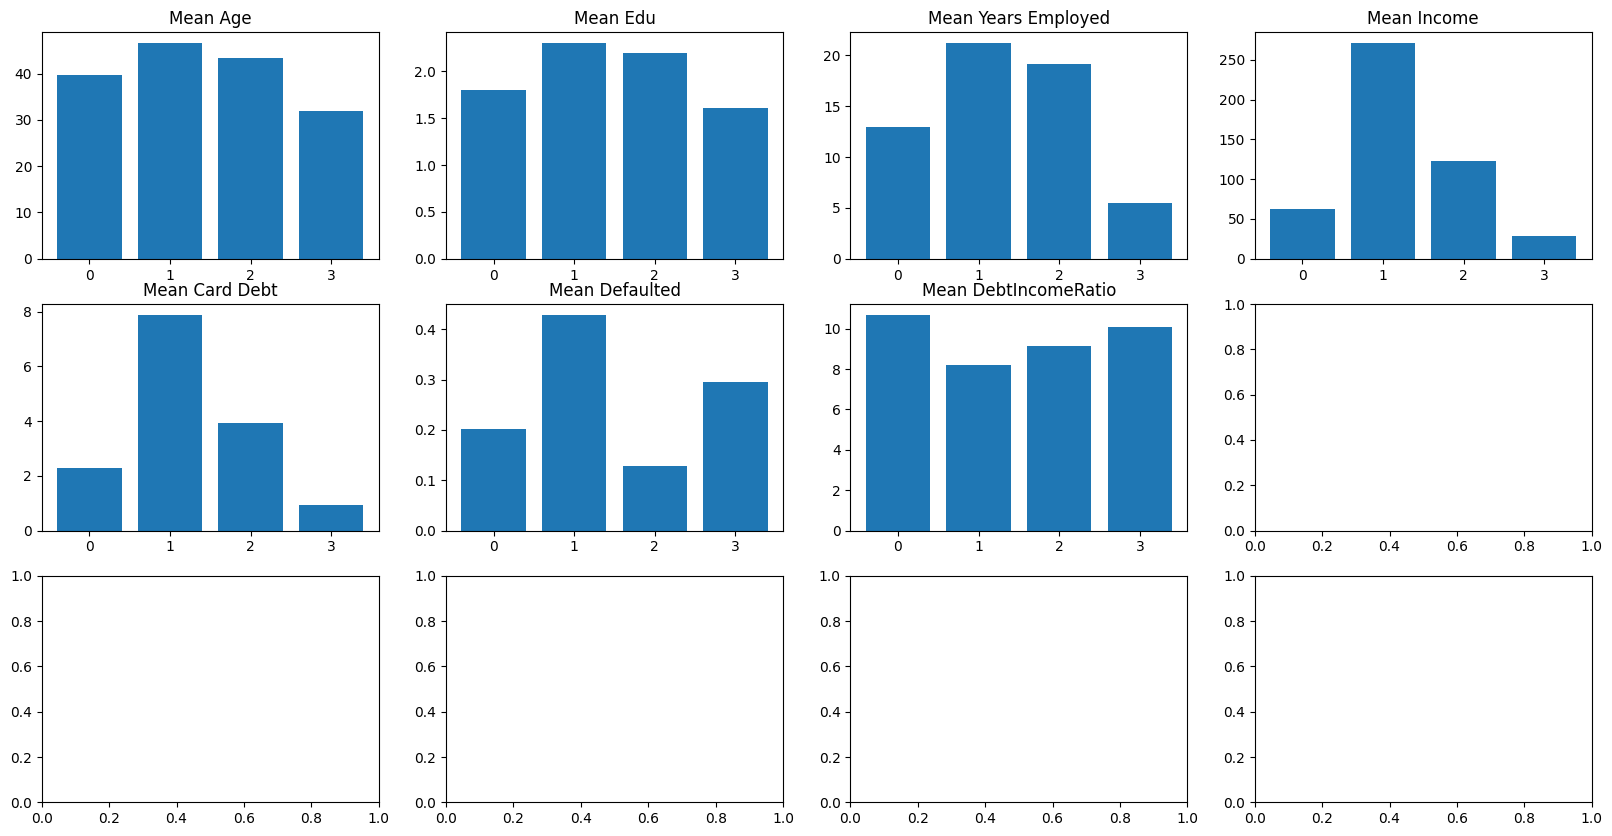

In [14]:
# Visualize means
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

In [15]:
df.loc[df['cluster']==0].index

Int64Index([  2,   5,   6,   7,  10,  18,  23,  25,  28,  31,
            ...
            792, 793, 806, 807, 808, 813, 826, 830, 841, 849],
           dtype='int64', length=221)

#### cluster0:



- This cluster has a moderate average age of around 40 years.
- The level of education (Edu) is around 1.8, indicating that the education level is relatively low to moderate.
- The average years employed is approximately 13 years.
- The average income is around :$62,362.
- The default rate is low with an average of around 0.20.
- The debt-to-income ratio is approximately 10.69.

#### cluster1:



- This cluster has a higher average age of around 47 years.
- The education level (Edu) is higher, around 2.3.
- The average years employed is relatively high at about 21 years.
- The average income is significantly higher at $270,900.
- The default rate is moderate with an average of around 0.43.
- The debt-to-income ratio is relatively low at 8.21.

#### cluster2

- The average age of this cluster is around 43 years.
- The education level (Edu) is slightly lower, around 2.2.
- The average years employed is around 19 years.
- The average income is moderate at: $122,435
- The default rate is low with an average of around 0.13.
- The debt-to-income ratio is approximately 9.15

#### cluster3

- This cluster has a relatively younger average age of around 32 years.
- The education level (Edu) is lower, around 1.6.
- The average years employed is relatively low at about 5 years.
- The average income is the lowest among the clusters at $27,992.
- The default rate is moderate with an average of around 0.30.
- The debt-to-income ratio is approximately 10.11.

#### Recomendations

credit card offerings to each cluster's unique characteristics and needs can help the credit card company attract a wider range of customers and enhance customer satisfaction by providing relevant benefits and features.